In [13]:
# Density matrix sample code 
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister
import qiskit.quantum_info as qi
from qiskit.quantum_info import random_statevector, Statevector
from qiskit.visualization import plot_state_city, plot_bloch_multivector
import numpy as np

In [10]:
qr = QuantumRegister(2, 'qreg')
qc_1 = QuantumCircuit(qr)
qc_1.h(0)
qc_1.x(1)
qc_1.h(1)
density_matrix_state = qi.DensityMatrix.from_instruction(qc)
print(density_matrix_state)

DensityMatrix([[ 0.25+0.j,  0.25+0.j, -0.25+0.j, -0.25+0.j],
               [ 0.25+0.j,  0.25+0.j, -0.25+0.j, -0.25+0.j],
               [-0.25+0.j, -0.25+0.j,  0.25+0.j,  0.25+0.j],
               [-0.25+0.j, -0.25+0.j,  0.25+0.j,  0.25+0.j]],
              dims=(2, 2))


In [14]:
# we can also calculate this density matrix using simple outer product
sv = Statevector.from_instruction(qc_1)
print(np.outer(sv,sv))

[[ 0.25+0.j  0.25+0.j -0.25+0.j -0.25+0.j]
 [ 0.25+0.j  0.25+0.j -0.25+0.j -0.25+0.j]
 [-0.25+0.j -0.25+0.j  0.25-0.j  0.25-0.j]
 [-0.25+0.j -0.25+0.j  0.25-0.j  0.25-0.j]]


In [21]:
# another example of getting a density matrix and plotting same 
qc_2 = QuantumCircuit(2)
qc_2.h(0)
qc_2.cx(0,1)
Density_matrix_state = qi.DensityMatrix.from_instruction(qc_2)
print(Density_matrix_state)

DensityMatrix([[0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j]],
              dims=(2, 2))


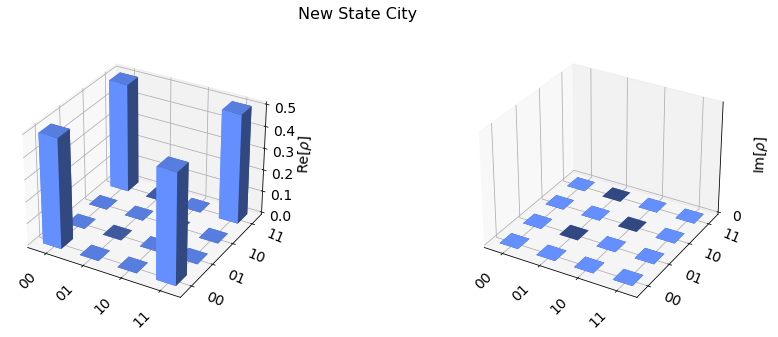

In [22]:
#state = DensityMatrix.from_instruction(qc)
plot_state_city(Density_matrix_state.data, title="New State City")

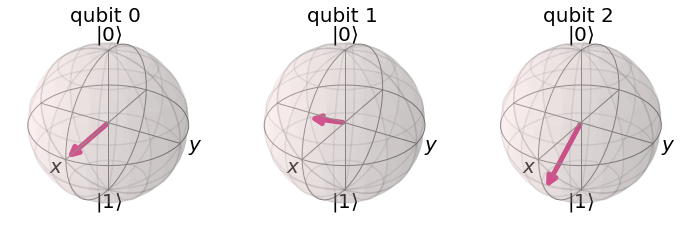

In [28]:
import math
# Here we have three pure states where one of the state is a result of
#hadamard gate and other two represents an error on hadamard operation 
psi_1 = [1/math.sqrt(2), 1/math.sqrt(2)]
psi_2 = [math.cos((2*math.pi/6)/2), math.sin((2*math.pi/6)/2)]
psi_3 = [math.cos((4*math.pi/6)/2), math.sin((4*math.pi/6)/2)]
qr = QuantumRegister(3)
qc= QuantumCircuit(qr)
qc.initialize(psi_1, 0)
qc.initialize(psi_2, 1)
qc.initialize(psi_3, 2)
sv = qi.Statevector.from_instruction(qc)
qc.draw()
plot_bloch_multivector(sv)

In [29]:
psi = 0.8 * qi.DensityMatrix(psi_1) + 0.1 * qi.DensityMatrix(psi_2) + 0.1* qi.DensityMatrix(psi_3) 
psi.draw('latex', prefix='\\rho_e = ')


<IPython.core.display.Latex object>

In [30]:
import numpy as np
rho_H_matrix = np.array([[1/2,np.sqrt(3)/20 + 2/5],[np.sqrt(3)/20 + 2/5,1/2]])
rho_H = qi.DensityMatrix(rho_H_matrix)
rho_H.draw('latex', prefix='\\rho_H = ')

<IPython.core.display.Latex object>

In [31]:
rho_0 = 1/3*qi.DensityMatrix.from_label('1') + 2/3*qi.DensityMatrix.from_label('+')
rho_0.draw('latex', prefix='\\rho_0 = ')

<IPython.core.display.Latex object>

In [32]:
psi = [1/np.sqrt(3), np.sqrt(2)/np.sqrt(3)]
qc= QuantumCircuit(1)
qc.initialize(psi,[0])
rho_H = qi.DensityMatrix.from_instruction(qc)
rho_H.draw('latex', prefix='\\rho_H = ')

<IPython.core.display.Latex object>

In [33]:
psi_x = [np.sqrt(2)/np.sqrt(3),1/np.sqrt(3)]
qc= QuantumCircuit(1)
qc.initialize(psi_x,[0])
rho_HX = qi.DensityMatrix.from_instruction(qc)
rho_HX.draw('latex', prefix='\\rho_HX = ')

<IPython.core.display.Latex object>

In [34]:
from qiskit.visualization import array_to_latex
X = qi.Operator.from_label('X')
array_to_latex(X.data, prefix='X =')

<IPython.core.display.Latex object>

In [35]:
rho_0p = rho_HX.evolve(X)
rho_0p.draw('latex', prefix='\\rho\'_0 = ')

<IPython.core.display.Latex object>

In [36]:
rho_p = qi.DensityMatrix.from_label('+')
display(rho_p.draw('latex', prefix='\\rho_p = '))
gamma_p = rho_p.purity()
print("State purity: ", np.round(np.real(gamma_p),3))

<IPython.core.display.Latex object>

State purity:  1.0


In [37]:
rho_m = 1/2*(qi.DensityMatrix.from_label('0') + qi.DensityMatrix.from_label('1'))
display(rho_m.draw('latex', prefix='\\rho_m = '))
gamma_m = rho_m.purity()
print("State purity: ", np.round(np.real(gamma_m),3))

<IPython.core.display.Latex object>

State purity:  0.5


In [55]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0, 1)
sv_AB = qi.Statevector.from_instruction(qc)
rho_AB = qi.DensityMatrix.from_instruction(qc)
print(sv_AB)
display(rho_AB.draw('latex', prefix='\\rho_{AB} = '))

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


<IPython.core.display.Latex object>

In [39]:
rho_B = qi.partial_trace(rho_AB,[0])
rho_A = qi.partial_trace(rho_AB,[1])

display(rho_B.draw('latex', prefix=" \\rho_{B} = "),
        rho_A.draw('latex', prefix=" \\rho_{A} = "))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [40]:
## difference between entanglement and classical distribution
qc1 = QuantumCircuit(2,2)
sv_1 = qi.Statevector.from_instruction(qc)

qc2 = QuantumCircuit(2,2)
qc2.x([0,1])
sv_2 = qi.Statevector.from_instruction(qc1)

#rho_12 = 0.5 * qi.DensityMatrix.from_instruction(qc1) + 0.5*qi.DensityMatrix.from_instruction(qc2)
rho_12 = 0.707*qi.DensityMatrix.from_label('11') + 0.707*qi.DensityMatrix.from_label('00')

#display(sv_AB.draw('latex', prefix='|\\psi_{AB} \\rangle = '))
display(rho_12.draw('latex', prefix='\\rho_{12} = '))

<IPython.core.display.Latex object>

In [ ]:
#end of program